In [1]:
from typing import List, Dict, Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import missingno as mns
import os
import warnings
import pickle

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../models/image/image2"
DATA_PATH = '../data/data/'
RESULT_PATH = '../data/summary/'
MODEL_PATH = '../models/model2/'

np.random.seed(42)

In [2]:
import pathlib2 as pl2
import shutil

def creat_dir():
    pic_path = pl2.Path(PIC_PATH)
    if os.path.exists(PIC_PATH):
        shutil.rmtree(PIC_PATH)
    pic_path.mkdir(parents=True, exist_ok=True)
    if not os.path.exists(RESULT_PATH):
        os.mkdir(RESULT_PATH)
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)

creat_dir()

In [3]:
figure_count = 0

def create_figure(figure_name, dpi=800):
    global figure_count
    figure_count += 1
    plt.savefig(PIC_PATH + f'/figure{figure_count}_{figure_name}.png', dpi=dpi)

In [4]:
def read_bins(path: str, res=True) -> Any:
    if res:
        f = open(RESULT_PATH + path, 'rb')
    else:
        f = open(path, 'rb')
    s = f.read()
    return pickle.loads(s)

def write_bins(model: Any, path: str, res=True) -> Any:
    path = RESULT_PATH + path if res else path
    m = pickle.dumps(model)
    with open(path, 'wb+') as f:
        f.write(m)

In [5]:
earth_list = read_bins('earth.list')

earthquake = pd.DataFrame()
for df in earth_list:
    earthquake = pd.concat([earthquake, df.T], axis=0)
earthquake

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
1_1,0.031847,-0.011189,-0.019609,0.019685,-0.020076,-0.000898,-0.001365,-0.006043,-0.005108,0.001909,...,0.883669,0.428054,-0.079484,0.102949,-0.804071,-2.936200,-3.392283,-2.868840,-2.935732,-2.460470
1_10,0.001247,-0.007641,-0.002028,-0.028223,-0.024481,0.002182,-0.013254,-0.001092,0.007796,-0.017464,...,-0.221415,-0.206446,-0.214398,-0.183993,-0.189138,-0.176508,-0.133005,-0.115230,-0.082953,-0.043660
1_11,-0.018077,-0.000769,0.005312,-0.000301,-0.010124,-0.010592,0.002973,0.005312,-0.005914,-0.019948,...,0.076414,0.053493,0.038057,0.067059,0.085770,0.106352,0.097932,0.050687,0.002506,-0.037723
1_12,-0.015064,-0.014596,0.003179,0.006454,-0.011789,0.012067,-0.001498,-0.007579,-0.005708,-0.014596,...,-0.200771,-0.134347,-0.079617,-0.021145,0.021423,0.074749,0.125737,0.150997,0.178128,0.199178
1_13,-0.004527,0.024943,0.007167,-0.011077,-0.013415,0.017458,0.020733,0.001554,-0.004995,0.026346,...,0.053945,0.042718,0.013716,-0.006398,0.018394,0.000618,-0.023706,-0.017625,-0.021835,-0.012479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_5,0.019407,0.015554,0.023260,0.019407,0.011702,0.007848,0.019407,0.015554,0.011702,0.011702,...,-14.875800,-18.131470,-17.715361,-15.981570,-15.049180,-16.813789,-22.496780,-27.910061,-29.482031,-28.403231
7_6,0.036187,0.005334,-0.006236,0.024617,0.051613,0.005334,-0.013949,0.036187,0.028473,-0.010092,...,0.471984,2.508274,2.381006,5.277321,11.297490,13.838990,9.731706,6.183623,6.411163,5.450867
7_7,0.041472,0.033761,0.014482,-0.000942,-0.012509,-0.020221,-0.008654,-0.000942,0.006770,0.010626,...,-27.342859,-22.812229,-17.973120,-13.299810,-9.262724,-6.428665,-5.175508,-5.013562,-5.433851,-6.436376
7_8,-0.373317,-0.381023,-0.388728,-0.373317,-0.365611,-0.369464,-0.365611,-0.365611,-0.369464,-0.373317,...,-23.448170,-17.137159,-6.992551,4.146103,13.820660,21.441641,24.342859,20.732719,12.961470,3.336999


In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(earthquake)
earth = ss.transform(earthquake)

In [7]:
target = np.array([[i] * 20 for i in [4.2, 5., 6., 6.4, 7., 7.4, 8.]]).reshape(-1, 1)
target

array([[4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [4.2],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [5. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
       [6.4],
      

In [8]:
earth[1::2]

array([[-0.02943009, -0.04958038, -0.01347818, ..., -0.070183  ,
        -0.06602301, -0.08400223],
       [-0.12255486, -0.08926263,  0.01648096, ..., -0.04951783,
        -0.04326272, -0.06139769],
       [-0.02877179, -0.12098008,  0.05178092, ..., -0.05920839,
        -0.05838715, -0.07867927],
       ...,
       [ 0.07425176,  0.08275451,  0.13202032, ..., -2.227688  ,
        -2.6289494 , -2.7238507 ],
       [ 0.20023258,  0.18663065,  0.08151147, ..., -0.45040396,
        -0.5324988 , -0.67906773],
       [-0.10176799, -0.04916916, -0.0453608 , ...,  0.16912287,
         0.00942468, -0.23024088]], dtype=float32)

In [9]:
from keras.layers import *
from keras.models import *
from keras.metrics.regression_metrics import *
from tcn import TCN

model = Sequential()
# model.add(TCN(input_shape=(8000, 1)))
model.add(Conv1D(32, 31, activation='relu', input_shape=(8000, 1)))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(MaxPooling1D(5))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(Dropout(.3))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(Dropout(.3))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1,))
model.compile(loss='mse', metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
hist = model.fit(earth[::2].reshape(-1, 8000, 1), target[::2].reshape(-1, 1), epochs=32, validation_split=.1)

Epoch 1/32
2/2 [==============================] - 4s 2s/step - loss: 525.8044 - root_mean_squared_error: 22.9304 - mean_absolute_error: 14.7171 - val_loss: 63.0914 - val_root_mean_squared_error: 7.9430 - val_mean_absolute_error: 7.9429
Epoch 2/32
2/2 [==============================] - 3s 2s/step - loss: 34.9632 - root_mean_squared_error: 5.9130 - mean_absolute_error: 5.8186 - val_loss: 55.5163 - val_root_mean_squared_error: 7.4509 - val_mean_absolute_error: 7.4387
Epoch 3/32
2/2 [==============================] - 3s 2s/step - loss: 22.8718 - root_mean_squared_error: 4.7825 - mean_absolute_error: 4.5824 - val_loss: 22.5609 - val_root_mean_squared_error: 4.7498 - val_mean_absolute_error: 3.6466
Epoch 4/32
2/2 [==============================] - 4s 2s/step - loss: 18.1906 - root_mean_squared_error: 4.2650 - mean_absolute_error: 3.8803 - val_loss: 25.5485 - val_root_mean_squared_error: 5.0546 - val_mean_absolute_error: 4.5617
Epoch 5/32
2/2 [==============================] - 3s 1s/step - lo

In [10]:
model.evaluate(earthquake.to_numpy()[1::2].reshape(-1, 8000, 1), target[1::2].reshape(-1, 1))

3/3 [==============================] - 0s 70ms/step - loss: 101.7366 - root_mean_squared_error: 10.0865 - mean_absolute_error: 5.8400


[101.73657989501953, 10.086455345153809, 5.839955806732178]

In [11]:
model.predict(earth.reshape(-1, 8000, 1))

5/5 [==============================] - 1s 90ms/step


array([[4.495049 ],
       [4.4036274],
       [4.512917 ],
       [4.4266424],
       [4.433288 ],
       [4.3745093],
       [4.4250436],
       [4.4307055],
       [4.4486585],
       [4.4949417],
       [4.4873233],
       [4.542111 ],
       [4.5358596],
       [4.5042033],
       [4.5419693],
       [4.516417 ],
       [4.523461 ],
       [4.2084336],
       [4.242615 ],
       [4.2520776],
       [4.442923 ],
       [4.5217376],
       [4.5782037],
       [4.479841 ],
       [4.4065375],
       [4.3367295],
       [4.426805 ],
       [4.3589997],
       [4.196876 ],
       [4.516235 ],
       [4.4526033],
       [4.555397 ],
       [4.3857937],
       [4.490215 ],
       [4.2075944],
       [4.3640027],
       [4.2473826],
       [4.284249 ],
       [4.20704  ],
       [4.331441 ],
       [4.535213 ],
       [4.5837092],
       [4.5929866],
       [4.3227086],
       [4.4780774],
       [4.799595 ],
       [4.397244 ],
       [4.590964 ],
       [4.4484167],
       [4.371153 ],


In [12]:
model = Sequential()
# model.add(TCN(input_shape=(8000, 1)))
model.add(Conv2D(32, (5, 5), activation='relu6', input_shape=(8000, 20, 1)))
model.add(Dropout(.3))
model.add(Conv2D(32, (5, 5), activation='relu6'))
model.add(Dropout(.3))
model.add(Conv2D(32, (5, 5), activation='relu6'))
model.add(MaxPooling2D(5))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(Dropout(.3))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(Dropout(.3))
# model.add(Conv1D(32, 31, activation='relu'))
# model.add(MaxPooling1D(5))
model.add(Flatten())
# model.add(Dense(16, activation='relu6'))
model.add(Dense(1,))
model.compile(loss='mse', metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

In [13]:
model.fit(np.array([i.to_numpy().reshape(8000, 20, 1) for i in earth_list]).reshape((7, 8000, 20, 1)),
          np.array([4.2, 5., 6., 6.4, 7., 7.4, 8.]).reshape(7, -1),
          epochs=32, validation_split=.1)

Epoch 1/32
1/1 [==============================] - 3s 3s/step - loss: 23.8677 - root_mean_squared_error: 4.8855 - mean_absolute_error: 4.6536 - val_loss: 8382.4951 - val_root_mean_squared_error: 91.5560 - val_mean_absolute_error: 91.5560
Epoch 2/32
1/1 [==============================] - 2s 2s/step - loss: 22363.5469 - root_mean_squared_error: 149.5445 - mean_absolute_error: 95.0442 - val_loss: 40.0457 - val_root_mean_squared_error: 6.3282 - val_mean_absolute_error: 6.3282
Epoch 3/32
1/1 [==============================] - 2s 2s/step - loss: 20.7612 - root_mean_squared_error: 4.5564 - mean_absolute_error: 4.2927 - val_loss: 38.5940 - val_root_mean_squared_error: 6.2124 - val_mean_absolute_error: 6.2124
Epoch 4/32
1/1 [==============================] - 2s 2s/step - loss: 18.9559 - root_mean_squared_error: 4.3538 - mean_absolute_error: 3.9204 - val_loss: 36.5561 - val_root_mean_squared_error: 6.0462 - val_mean_absolute_error: 6.0462
Epoch 5/32
1/1 [==============================] - 2s 2s/st

In [14]:
model.predict(np.array([i.to_numpy().reshape(8000, 20, 1) for i in earth_list]).reshape((7, 8000, 20, 1)))

1/1 [==============================] - 0s 237ms/step


array([[1.255516 ],
       [1.9415469],
       [3.0935006],
       [4.1090927],
       [2.6904442],
       [2.71999  ],
       [8.374036 ]], dtype=float32)

In [15]:
from sklearn.decomposition import PCA

class Integrity(object):

    def __init__(self, x:pd.DataFrame):
        self.x = x

    def simple_mean(self):
        return self.x.mean(axis=1)

    def weighted_mean_based_max(self):
        weight_list = self.x.max(axis=0) / self.x.max(axis=0).sum()
        return (self.x * weight_list).sum(axis=1)

    def weighted_mean_based_range(self):
        weight_list = self.x.max(axis=0) / (self.x.max(axis=0) -self.x.min(axis=0)).sum()
        return (self.x * weight_list).sum(axis=1)

    def pca(self, components=1):
        model = PCA(components)
        model.fit(self.x)
        print(model.explained_variance_ratio_)
        return model.transform(self.x).reshape(-1, )

In [16]:
mean = pd.DataFrame()
weight = pd.DataFrame()
weight_range = pd.DataFrame()
var = pd.DataFrame()

e_num = 1
for e in earth_list:
    integrity = Integrity(e)
    mean[f'evnet_{e_num}'] =  integrity.simple_mean()
    weight[f'evnet_{e_num}'] =  integrity.weighted_mean_based_max()
    weight_range[f'evnet_{e_num}'] =  integrity.weighted_mean_based_range()
    var[f'evnet_{e_num}'] =  integrity.pca()
    e_num += 1

s_mean = StandardScaler().fit_transform(mean)
s_weight = StandardScaler().fit_transform(weight)
s_weight_range = StandardScaler().fit_transform(weight_range)
s_var = StandardScaler().fit_transform(var)
t2 = [4.2, 5., 6., 6.4, 7., 7.4, 8.]

[0.476905]
[0.1343542]
[0.22159533]
[0.60752344]
[0.15796517]
[0.14141072]
[0.23807944]


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [42]:
for _ in [DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), SVR(), LinearRegression(), Lasso(),
          KNeighborsRegressor(), ]:
    print(str(_.__class__))
    print(cross_val_score(_, mean.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print(cross_val_score(_, weight.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print(cross_val_score(_, weight_range.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print(cross_val_score(_, var.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print()

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
[3.4  1.48 0.16 5.76 4.  ]
[ 5.3   4.04  0.36 10.24  1.  ]
[ 5.62  3.4   1.   10.24  0.36]
[ 3.4   4.04  1.   10.24  0.36]

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
[6.61116238 0.09617112 0.64092043 3.18130144 6.17607487]
[4.4858128  0.19337372 0.59775118 2.96341028 4.16906269]
[5.03150404 0.12729362 0.94560781 3.59629202 3.22171733]
[4.35600679 0.37548091 0.22913279 2.78538478 2.60215589]

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[4.973618 0.259298 0.952576 3.3856   5.080516]
[4.715072 0.171216 1.3456   2.917264 3.363556]
[4.876456 0.064756 0.891136 3.326976 3.857296]
[4.883444 0.234    0.1681   3.013696 3.407716]

<class 'sklearn.svm._classes.SVR'>
[5.42908152 0.38546872 0.06634375 1.8500298  3.27794293]
[7.44526972 0.26680622 0.14848517 2.26718226 3.44439102]
[7.44506568 0.26470946 0.14456694 2.26717307 3.44065534]
[6.56617905 0.33369589 0.11618286 2.27156091 3.62144054]

<class 'sklearn.linear_mod

In [43]:
decomon = PCA(.99)
mean_pca = decomon.fit_transform(mean.T)
weight_mean_pca = decomon.fit_transform(weight.T)
weight_mean_range = decomon.fit_transform(weight_range.T)

for _ in [DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), SVR(), LinearRegression(), Lasso(),
          KNeighborsRegressor(), ]:
    print(str(_.__class__))
    print(cross_val_score(_, mean_pca, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print(cross_val_score(_, weight_mean_pca, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print(cross_val_score(_, weight_mean_range, t2, cv=5, scoring=make_scorer(mean_squared_error)))
    print()

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
[2.12 1.78 1.   5.76 2.56]
[4.5  1.78 1.   5.76 4.  ]
[ 8.    1.    1.   10.24  4.  ]

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
[2.12008882 1.83835777 0.99999115 5.75985976 1.32946554]
[6.25940654 1.33340783 0.99999115 7.24801507 4.        ]
[6.23819984 1.12899795 0.99999115 6.49113937 4.        ]

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[4.149    0.90637  2.9584   5.494336 2.2201  ]
[4.569098 0.55712  1.9881   6.584356 4.682896]
[4.301908 0.628106 1.9044   6.370576 4.2025  ]

<class 'sklearn.svm._classes.SVR'>
[5.33341598 0.33701577 0.04035031 2.00665266 3.31723374]
[7.45267739 0.23347578 0.13302423 2.26004018 3.32721443]
[7.45309824 0.2303219  0.12954382 2.26004845 3.32573044]

<class 'sklearn.linear_model._base.LinearRegression'>
[4.57845898e+00 7.33567536e+05 3.50726389e+06 5.51989745e+00
 2.68353650e+04]
[4.56873516e+00 8.61811500e+05 7.11243843e+06 5.47801736e+00
 3.06191442e+03]
[4.56880435e+0

In [20]:
lr = SVR().fit(weight_mean_pca[:-1], t2[:-1])
lr.predict(weight_mean_pca[-1].reshape(1, -1))

array([6.17593464])

In [21]:
earthquake.var(axis=1).sort_values(ascending=False)

5_1     6666.245605
5_4     5638.769043
5_2     5102.808594
5_7     4347.647461
5_8     3125.873779
           ...     
2_2        0.012443
2_20       0.012220
1_14       0.010630
7_1        0.005386
1_17       0.004611
Length: 140, dtype: float32

In [22]:
value = earthquake.loc[['5_1', '7_7', '4_4', '1_1', '3_17','6_17', '2_9']]
value

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
5_1,-0.038885,-0.000299,0.015135,-0.027310,-0.019592,0.018994,0.007419,-0.027310,0.003560,0.022853,...,5.108586,1.438986,2.388221,-4.812066,-7.783246,-0.868501,1.265346,-2.365667,4.213374,15.148860
7_7,0.041472,0.033761,0.014482,-0.000942,-0.012509,-0.020221,-0.008654,-0.000942,0.006770,0.010626,...,-27.342859,-22.812229,-17.973120,-13.299810,-9.262724,-6.428665,-5.175508,-5.013562,-5.433851,-6.436376
4_4,-0.038124,-0.057303,-0.038592,-0.029236,-0.029236,-0.042334,-0.032511,0.001637,-0.002105,0.008654,...,11.039310,14.963030,19.800310,25.399139,29.954821,32.885910,34.356129,33.837372,31.122860,28.505180
1_1,0.031847,-0.011189,-0.019609,0.019685,-0.020076,-0.000898,-0.001365,-0.006043,-0.005108,0.001909,...,0.883669,0.428054,-0.079484,0.102949,-0.804071,-2.936200,-3.392283,-2.868840,-2.935732,-2.460470
3_17,-0.019819,-0.001576,-0.035724,0.017135,-0.008592,-0.026836,0.025555,-0.010931,-0.004850,0.003570,...,-0.843575,-0.596121,-0.351941,-0.138635,0.097125,0.155130,0.082624,-0.032917,-0.169508,-0.171379
6_17,0.008146,0.000425,0.008146,0.004286,0.000425,0.008146,0.004286,-0.007296,0.000425,0.004286,...,-1.524491,-1.632586,-1.690495,-1.678913,-1.624865,-1.482025,-1.273556,-0.984015,-0.582518,-0.142415
2_9,0.089125,0.035799,0.005394,0.036735,0.050768,0.079302,0.104562,0.160695,0.210747,0.228056,...,0.007732,0.051236,0.101288,0.130758,0.158824,0.171454,0.161163,0.185488,0.149001,0.069011


In [23]:
conv = pd.DataFrame()
for i in value.T.columns:
    a = value.T[[i]].idxmax()
    conv[a.index[0]] = value.T[i][a[0] -300: a[0] + 300].tolist()
conv

,5_1,7_7,4_4,1_1,3_17,6_17,2_9
0,32.150181,30.290710,63.565079,0.552015,-2.027987,-1.566957,0.135903
1,18.984381,29.966820,68.015053,-0.007914,-1.909639,-1.555375,0.274833
2,24.614189,23.855280,40.754391,-2.134897,-1.827310,-1.493606,0.354355
3,38.802528,13.197680,-0.639685,-3.811879,-1.796905,-1.400953,0.395051
4,44.733311,2.998919,-27.338539,-2.357092,-1.683235,-1.331463,0.390374
...,...,...,...,...,...,...,...
595,-236.703003,-51.989540,1.158918,3.361485,-1.051736,-1.146158,0.897444
596,-231.532394,-75.772499,-5.143912,1.821095,-0.086711,-1.011038,0.822600
597,-173.617493,-90.451767,-10.457860,1.037568,1.106121,-0.941548,0.782839
598,-120.657204,-95.263893,-10.143980,1.265375,2.513663,-0.956991,0.842715


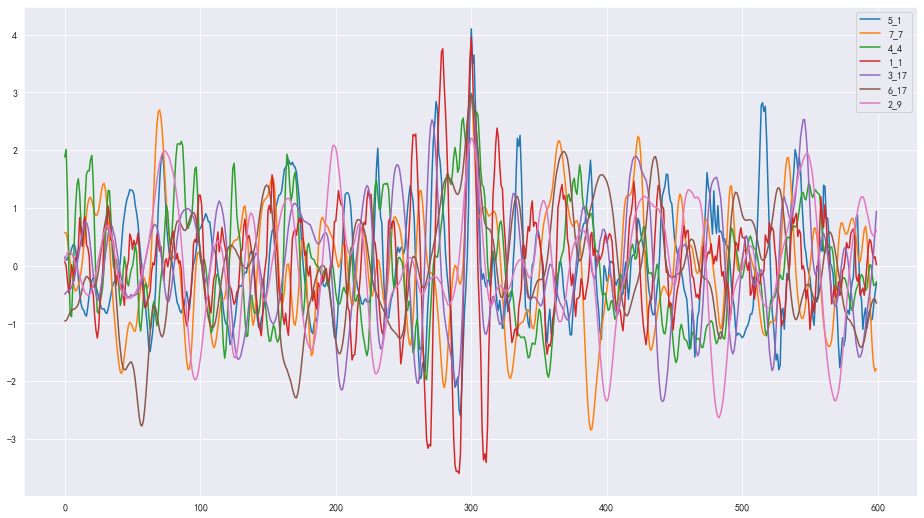

In [24]:
s_conv = pd.DataFrame(ss.fit_transform(conv), columns=conv.columns)
s_conv.plot(figsize=(16, 9))
create_figure('extract')

,5_1,7_7,4_4,1_1,3_17,6_17,2_9
0,8.447334,-7.246588,7.315387,-53.190969,-27.547656,-10.026562,-23.777036
1,16.345911,3.833219,12.503355,-52.598230,-14.137426,-9.221542,-13.819959
2,21.212001,8.778330,12.761318,-43.414130,-10.881849,-9.239901,-11.758314
3,24.156363,15.078363,10.965973,-36.501851,-9.000196,-10.248225,-11.946413
4,23.255272,19.434451,15.344402,-29.967332,-6.208449,-10.431394,-15.188224
...,...,...,...,...,...,...,...
124,-66.137948,-78.016626,-96.966319,-94.147382,-95.749149,-77.226093,-97.065783
125,-73.589134,-78.801175,-97.710186,-96.564236,-97.600035,-78.008185,-96.754973
126,-76.413981,-78.698059,-97.328590,-98.344601,-96.798908,-78.409360,-97.773485
127,-77.604904,-78.881423,-96.709181,-98.961764,-97.119005,-78.443032,-97.084901


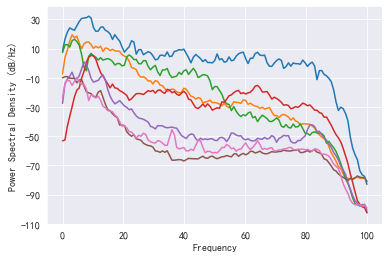

In [25]:
psd = pd.DataFrame()

for i in value.T.columns:
    psd[i] = plt.psd(value.T[i], return_line=False, Fs=200)[0]

psd = 10 * np.log10(psd)
psd

In [26]:
from sklearn.metrics import mean_squared_error

for _ in [DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), SVR(), LinearRegression(), Lasso(),
          KNeighborsRegressor(), ]:
    print(str(_.__class__))
    print(cross_val_score(_, psd.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
[5.92 1.48 0.36 0.36 0.36]
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
[2.68270644 0.39349888 0.10718618 0.17442163 0.57122876]
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[3.877640e+00 3.601700e-01 6.400000e-03 2.116000e-03 1.044484e+00]
<class 'sklearn.svm._classes.SVR'>
[3.54965209 0.77261162 0.00817045 0.14859551 0.79312166]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.19951285 0.16940348 0.03302424 0.08165343 0.1214606 ]
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
[1.29743602 0.2545309  0.00514142 0.44204027 0.32385609]
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
[5.7296 0.0544 0.1936 0.8464 2.6896]


In [27]:
from sklearn.model_selection import cross_val_predict

rf = cross_val_predict(RandomForestRegressor(), psd.T, t2, cv=5).round(1).tolist()
svr = cross_val_predict(SVR(), psd.T, t2, cv=5).round(1).tolist()
ls = cross_val_predict(Lasso(), psd.T, t2, cv=5).round(1).tolist()

ls

[5.4, 6.0, 5.3, 6.4, 6.9, 8.1, 7.4]

In [28]:
lr = Lasso()
lr.fit(psd.T, t2)
coef = pd.Series(lr.coef_, index=range(1, 130))
coef[coef != 0]

12    -0.027167
23    -0.028045
26    -0.002806
125   -0.008997
dtype: float64

In [29]:
lr.intercept_

5.118652553068855

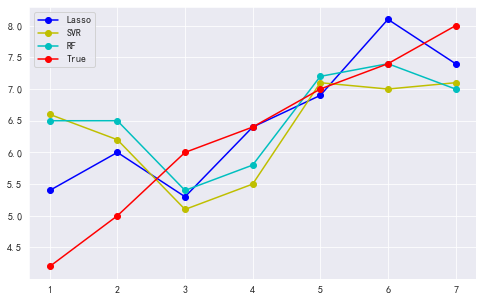

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), ls, 'bo-', label='Lasso')
plt.plot(range(1, 8), svr, 'yo-', label='SVR')
plt.plot(range(1, 8), rf, 'co-', label='RF')
plt.plot(range(1, 8), t2, 'ro-', label='True')
plt.legend()

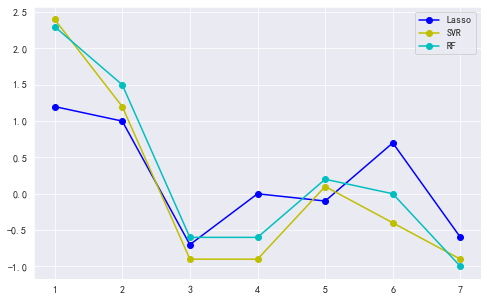

In [31]:
def mul(ls1, ls2):
    return np.array(ls1) - np.array(ls2)

r_ls = mul(ls, t2)
r_svr = mul(svr, t2)
r_rf = mul(rf, t2)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), r_ls, 'bo-', label='Lasso')
plt.plot(range(1, 8), r_svr, 'yo-', label='SVR')
plt.plot(range(1, 8), r_rf, 'co-', label='RF')
plt.legend()

In [32]:
np.abs(r_ls).mean(), np.abs(r_svr).mean(), np.abs(r_rf).mean()

(0.6142857142857141, 0.9714285714285715, 0.8857142857142858)

In [33]:
for _ in [DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), SVR(), LinearRegression(), Lasso(),
          KNeighborsRegressor(), ]:
    print(str(_.__class__))
    print(cross_val_score(_, s_conv.T, t2, cv=5, scoring=make_scorer(mean_squared_error)))

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
[ 8.    4.04  7.84  5.76 14.44]
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
[5.06341668 0.01711404 2.46278473 2.46018708 3.85122376]
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[5.77729  0.087944 0.712336 1.7956   4.6225  ]
<class 'sklearn.svm._classes.SVR'>
[5.62406162 0.320453   0.7669267  1.52123219 3.75263073]
<class 'sklearn.linear_model._base.LinearRegression'>
[5.32317393 0.91674502 1.68724139 1.055374   6.54607518]
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
[5.7296     0.06650212 0.27953638 1.31522169 5.03515649]
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
[5.7296 0.0544 1.1664 0.8464 5.1984]


In [34]:
def read_data() -> pd.DataFrame:
    data_path = pl2.Path(DATA_PATH + '附件9')
    temp = pd.DataFrame()
    for txt in data_path.iterdir():
        array = pd.read_csv(txt, header=None, dtype='float32', sep='  ').T
        array.columns = [txt.stem]
        temp = pd.concat([temp, array], axis=1)
    return temp

tg = read_data()
tg

,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9
0,-0.018121,0.129666,0.093444,-0.039594,0.034525,-0.017206,0.037083,0.014242,-0.005727,0.001487,-0.004651,-0.006964,0.000754,0.004070,-0.006353,-0.007183,0.000025,0.584617,-0.219694,0.204865
1,-0.011572,0.095986,-0.098345,-0.065790,0.022830,-0.015803,0.024453,0.000677,-0.000582,0.009907,-0.003247,-0.019594,-0.007198,0.008281,-0.007756,-0.011393,-0.002314,0.577600,-0.102283,0.180072
2,-0.002684,-0.137434,-0.083844,-0.049886,0.032186,-0.002705,0.038019,-0.008679,0.014387,-0.004594,-0.002780,-0.021465,-0.005327,0.005941,-0.012434,0.002172,-0.014008,0.535033,0.053488,0.013076
3,0.001526,-0.196843,0.122446,0.003441,0.058382,0.015070,0.046439,0.006290,-0.005260,0.001954,-0.003247,-0.000883,0.011045,0.022781,-0.007289,-0.008587,-0.033655,0.399377,0.248551,-0.272268
4,-0.005023,0.014593,0.131334,-0.002640,0.060253,0.030507,0.049245,-0.009614,0.004564,0.000083,-0.017748,-0.023804,-0.010472,0.015297,0.001599,-0.002038,-0.034123,0.255302,0.500215,-0.441136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3.255853,-3.010991,7.072680,0.896428,0.855474,-0.456449,-0.032148,0.131654,-0.293878,0.063701,0.110423,-1.717158,-1.465260,0.230007,1.304827,0.738921,0.268529,0.258576,0.063311,0.038804
7996,3.335843,-0.998145,5.946740,-2.363980,0.868572,-0.477967,-0.014840,0.351510,-0.117994,0.176903,0.114165,-1.609101,-1.481632,0.210828,1.359557,0.767456,0.293789,0.231913,0.011856,0.020560
7997,3.391508,0.540375,3.495588,-5.519137,0.892896,-0.539246,-0.015308,0.576511,0.027017,0.240989,0.117439,-1.467832,-1.503617,0.168728,1.421771,0.776344,0.325598,0.181393,-0.042407,-0.015926
7998,3.431737,0.786893,0.451293,-7.890768,0.886815,-0.575732,-0.023728,0.787946,0.161269,0.239118,0.108551,-1.364454,-1.546653,0.167793,1.485389,0.773069,0.355536,0.101871,-0.033987,-0.023411


In [35]:
tg.var().sort_values()

15     0.024960
9      0.070824
13     0.084627
8      0.113616
7      0.130512
17     0.148067
14     0.216666
6      0.221654
16     0.279107
18     0.352136
4      0.392123
5      0.583251
3      0.889213
2      1.329552
1      1.412570
19     2.026830
20     2.391554
10    26.775387
12    28.519337
11    40.350296
dtype: float32

In [36]:
tg2 = tg['12']
tg2

0      -0.039594
1      -0.065790
2      -0.049886
3       0.003441
4      -0.002640
          ...   
7995    0.896428
7996   -2.363980
7997   -5.519137
7998   -7.890768
7999   -8.780012
Name: 12, Length: 8000, dtype: float32

array([3.81466033e-02, 1.47489746e-01, 1.42112432e-01, 1.87882354e-01,
       3.48761361e-01, 4.48427702e-01, 7.07205019e-01, 7.92446116e-01,
       4.02331163e-01, 7.36135838e-01, 2.67035856e-01, 2.56689328e-01,
       7.56645530e-01, 6.04576846e-01, 3.94235803e-01, 3.44660594e-01,
       7.44832415e-01, 8.37816389e-01, 9.01284709e-01, 1.25380192e+00,
       1.07287586e+00, 1.74839781e+00, 2.49483701e+00, 2.97987717e+00,
       4.91493966e+00, 2.26142515e+00, 9.82616467e-01, 1.34828701e+00,
       1.14579051e+00, 6.89785805e-01, 4.50282759e-01, 2.53591262e-01,
       5.54866393e-01, 1.07197634e+00, 3.67437397e-01, 1.03509297e-01,
       1.63241524e-01, 8.17189728e-02, 1.16230330e-01, 8.97033336e-02,
       8.30929144e-02, 4.45197739e-02, 2.74852228e-02, 1.70659068e-02,
       3.86765161e-02, 5.88476826e-02, 1.12453729e-02, 1.66412671e-02,
       1.49804186e-02, 1.89412694e-02, 1.05882593e-02, 1.33576755e-02,
       2.60255900e-02, 3.60320893e-02, 3.21986993e-02, 1.36214630e-02,
      

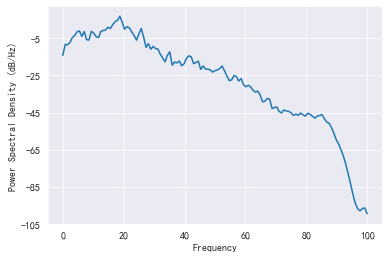

In [37]:
tg2 = plt.psd(tg2, return_line=False, Fs=200)[0]
tg2

In [38]:
tg2 = 10 * np.log10(tg2)
tg2

array([-1.41854413e+01, -8.31238173e+00, -8.47367930e+00, -7.26114006e+00,
       -4.57471636e+00, -3.48307567e+00, -1.50454666e+00, -1.01030259e+00,
       -3.95416327e+00, -1.33042038e+00, -5.73430420e+00, -5.90592187e+00,
       -1.21107529e+00, -2.18548490e+00, -4.04243938e+00, -4.62608368e+00,
       -1.27941431e+00, -7.68511487e-01, -4.51379970e-01,  9.82289310e-01,
        3.05494733e-01,  2.42640255e+00,  3.97042178e+00,  4.74198363e+00,
        6.91518191e+00,  3.54382218e+00, -7.61596196e-02,  1.29782350e+00,
        5.91052209e-01, -1.61285747e+00, -3.46514681e+00, -5.95865715e+00,
       -2.55811579e+00,  3.01851994e-01, -4.34816644e+00, -9.85020640e+00,
       -7.87169359e+00, -1.08767710e+01, -9.34680530e+00, -1.04719142e+01,
       -1.08043601e+01, -1.35144705e+01, -1.56090074e+01, -1.76787063e+01,
       -1.41255265e+01, -1.23027063e+01, -1.94902614e+01, -1.77881361e+01,
       -1.82447605e+01, -1.72259092e+01, -1.97517543e+01, -1.87426911e+01,
       -1.58459942e+01, -

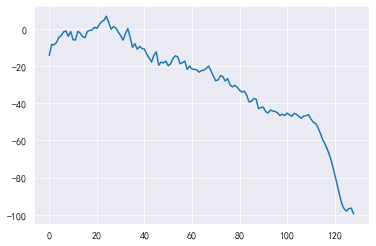

In [39]:
plt.plot(tg2)

In [40]:
lr.predict(tg2.reshape(1, -1))

array([6.02949217])

In [47]:
svr = SVR().fit(psd.T, t2)
svr.predict(tg2.reshape(1, -1))

array([6.08216431])

In [48]:
rf = RandomForestRegressor().fit(psd.T, t2)
rf.predict(tg2.reshape(1, -1))

array([6.02])